In [13]:
import os
import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import time
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import chart_studio.plotly as py

In [25]:
import chart_studio
chart_studio.tools.set_credentials_file(username=os.environ.get('plotly_username'), api_key=os.environ.get('plotly_api_key'))

In [15]:
pd.options.display.max_columns = 75
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 50

In [16]:
us_daily_df = pd.read_json('https://api.covidtracking.com/v1/us/daily.json')

In [17]:
us_daily_df['date'] = pd.to_datetime(us_daily_df['date'],format='%Y%m%d')

In [151]:
pd.date_range(start='1/31/2018', end= dt.datetime.now(), freq='Y')[-1]

Timestamp('2019-12-31 00:00:00', freq='A-DEC')

In [31]:
#calculating dates
dates_days = pd.date_range(start='1/31/2020', end= dt.datetime.now())

yesterday = dates_days[-2]
two_days_ago = dates_days[-3]
one_week_ago = dates_days[-8]

In [19]:
us_daily_df.set_index('date', drop=True, inplace=True)

In [20]:
us_daily_df.sort_index(inplace=True)

In [21]:
us_daily_df_new_per_day = us_daily_df[['positive','hospitalizedCumulative','death']].diff(periods=1)

In [22]:
us_daily_df_new_per_day_rolling = us_daily_df_new_per_day.rolling(window=7).mean()

In [78]:
def change_text(change):
    '''
    This function defines the % change subtext in the top stats part
    '''
    if change > 0:
        return "↑ " + str("{:.0%}".format(change)+' 7-day Trend')
    elif change < 0:
        return "↓ " + str("{:}%".format(change)+' 7-day Trend')
    elif change == 0:
        return "No Change 7-day Trend"
    else:
        pass

def change_color(change):
    '''
    This function defines the % change subtext in the top stats part
    '''
    if change > 0:
        return "red"
    elif change < 0:
        return "green"
    elif change == 0:
        return "grey"
    else:
        pass


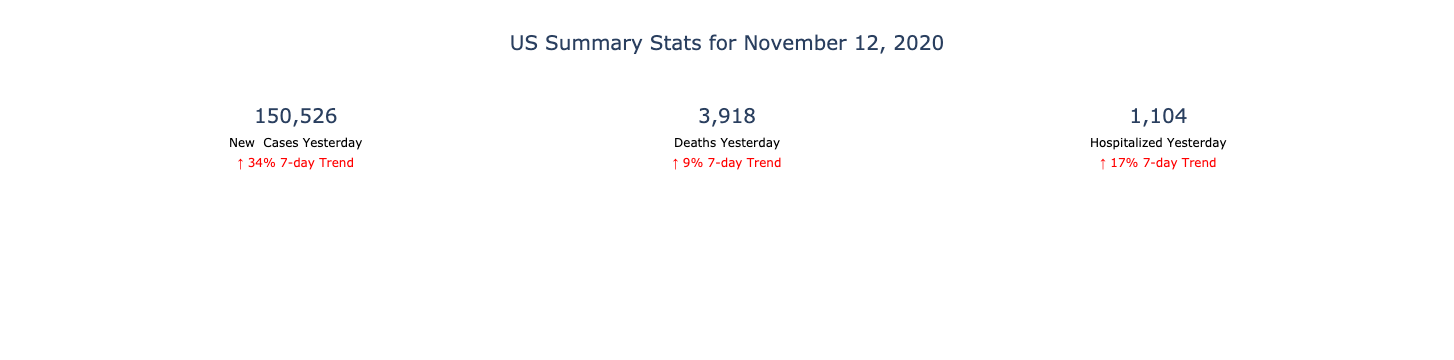

In [163]:
#Summary Stats

us_cases_yesterday = us_daily_df_new_per_day.loc[yesterday]['positive']
us_cases_death = us_daily_df_new_per_day.loc[yesterday]['death']
us_cases_hospitalized = us_daily_df_new_per_day.loc[yesterday]['hospitalizedCumulative']

us_cases_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['positive'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['positive'] - 1
us_death_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['death'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['death'] - 1
us_hospitalized_seven_day_trend = us_daily_df_new_per_day_rolling.loc[yesterday]['hospitalizedCumulative'] / us_daily_df_new_per_day_rolling.loc[one_week_ago]['hospitalizedCumulative'] - 1



fig0 = go.Figure(data=[go.Table(
    header=dict(values=['{:,}'.format(int(us_cases_yesterday)), '{:,}'.format(int(us_cases_hospitalized)), '{:,}'.format(int(us_cases_death))],
                fill_color='white',
                align='center',
               font_size=20,
                   height=30),
    cells=dict(values=[['New  Cases Yesterday', change_text(us_cases_seven_day_trend)], # 1st column
                       ['Deaths Yesterday', change_text(us_death_seven_day_trend)],
                      ['Hospitalized Yesterday',change_text(us_hospitalized_seven_day_trend)]], # 2nd column
               fill_color='white',
               font_color=[['black',change_color(us_cases_seven_day_trend)],['black',change_color(us_death_seven_day_trend)],['black',change_color(us_hospitalized_seven_day_trend)]],
               align='center')),
    
])

fig0.update_layout(height=50, autosize=True, title={
        'text': "US Summary Stats for "+ yesterday.strftime("%B %d, %Y"),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20})

py.iplot(fig0, filename = 'us_summary_stats')

fig0.show()

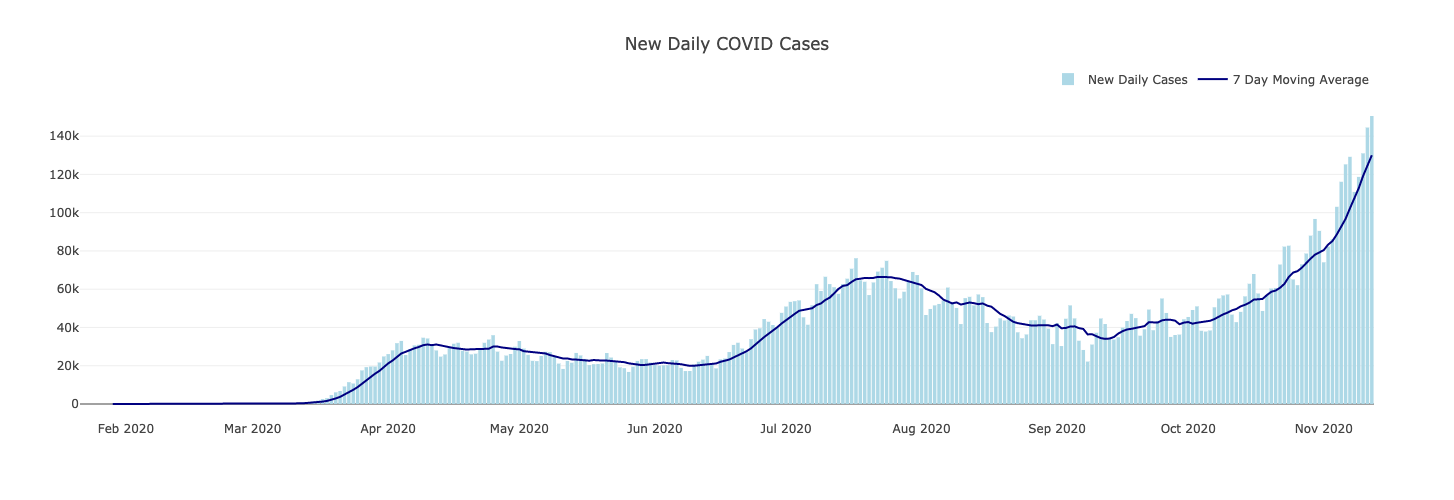

In [117]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=us_daily_df_new_per_day.index, y=us_daily_df_new_per_day['positive'], marker_color='lightblue', name= 'New Daily Cases'))
fig1.add_trace(go.Scatter(x=us_daily_df_new_per_day_rolling.index, y=us_daily_df_new_per_day_rolling['positive'], marker_color='#000080', name = '7 Day Moving Average'))


fig1.update_layout(template='none', height=500, autosize=True, title='New Daily COVID Cases',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig1, filename = 'us_new_daily_covid_cases')
fig1.show()

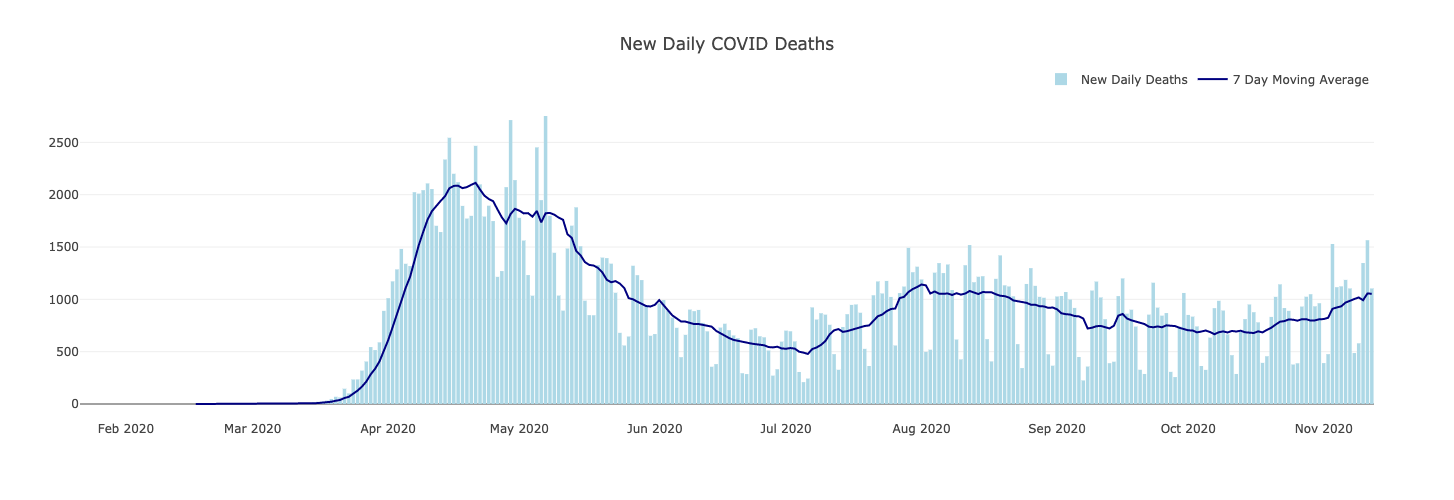

In [118]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x=us_daily_df_new_per_day.index, y=us_daily_df_new_per_day['death'], marker_color='lightblue', name= 'New Daily Deaths'))
fig2.add_trace(go.Scatter(x=us_daily_df_new_per_day_rolling.index, y=us_daily_df_new_per_day_rolling['death'], marker_color='#000080', name = '7 Day Moving Average'))


fig2.update_layout(template='none', height=500, autosize=True, title='New Daily COVID Deaths',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig2, filename = 'us_new_daily_covid_deaths')
fig2.show()

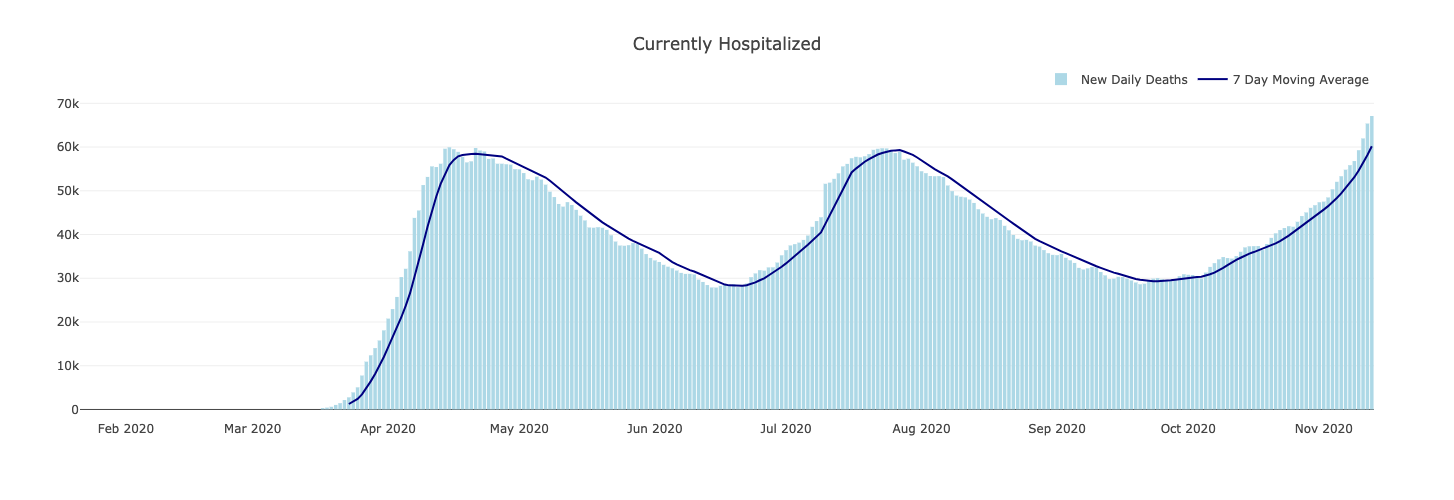

In [120]:
fig3 = go.Figure()


fig3.add_trace(go.Bar(x=us_daily_df.index, y=us_daily_df['hospitalizedCurrently'], marker_color='lightblue', name= 'New Daily Deaths'))

df = us_daily_df[['hospitalizedCurrently']].rolling(window=7).mean()
fig3.add_trace(go.Scatter(x=df.index, y=df['hospitalizedCurrently'], marker_color='#000080', name = '7 Day Moving Average'))


fig3.update_layout(template='none', height=500, autosize=True, title='Currently Hospitalized',legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
py.iplot(fig3, filename = 'us_new_daily_covid_hospitalized')
fig3.show()

# State Data

In [121]:
us_states_daily_df = pd.read_json('https://api.covidtracking.com/v1/states/daily.json')

In [122]:
us_states_daily_df['date'] = pd.to_datetime(us_states_daily_df['date'],format='%Y%m%d')

In [123]:
us_states_daily_df.set_index(['state','date'], drop=True, inplace=True)

In [124]:
us_states_daily_df.sort_index(level=[0,1], inplace=True)

In [141]:
state_codes = pd.DataFrame({'state_name': {0: 'Alabama', 1: 'Alaska', 2: 'American Samoa', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 6: 'Colorado', 7: 'Connecticut', 8: 'Delaware', 9: 'District Of Columbia', 10: 'Florida', 11: 'Georgia', 12: 'Guam', 13: 'Hawaii', 14: 'Idaho', 15: 'Illinois', 16: 'Indiana', 17: 'Iowa', 18: 'Kansas', 19: 'Kentucky', 20: 'Louisiana', 21: 'Maine', 22: 'Maryland', 23: 'Massachusetts', 24: 'Michigan', 25: 'Minnesota', 26: 'Mississippi', 27: 'Missouri', 28: 'Montana', 29: 'Nebraska', 30: 'Nevada', 31: 'New Hampshire', 32: 'New Jersey', 33: 'New Mexico', 34: 'New York', 35: 'North Carolina', 36: 'North Dakota', 37: 'Northern Mariana Is', 38: 'Ohio', 39: 'Oklahoma', 40: 'Oregon', 41: 'Pennsylvania', 42: 'Puerto Rico', 43: 'Rhode Island', 44: 'South Carolina', 45: 'South Dakota', 46: 'Tennessee', 47: 'Texas', 48: 'Utah', 49: 'Vermont', 50: 'Virginia', 51: 'Virgin Islands', 52: 'Washington', 53: 'West Virginia', 54: 'Wisconsin', 55: 'Wyoming'}, 'abbreviation': {0: 'AL', 1: 'AK', 2: 'AS', 3: 'AZ', 4: 'AR', 5: 'CA', 6: 'CO', 7: 'CT', 8: 'DE', 9: 'DC', 10: 'FL', 11: 'GA', 12: 'GU', 13: 'HI', 14: 'ID', 15: 'IL', 16: 'IN', 17: 'IA', 18: 'KS', 19: 'KY', 20: 'LA', 21: 'ME', 22: 'MD', 23: 'MA', 24: 'MI', 25: 'MN', 26: 'MS', 27: 'MO', 28: 'MT', 29: 'NE', 30: 'NV', 31: 'NH', 32: 'NJ', 33: 'NM', 34: 'NY', 35: 'NC', 36: 'ND', 37: 'MP', 38: 'OH', 39: 'OK', 40: 'OR', 41: 'PA', 42: 'PR', 43: 'RI', 44: 'SC', 45: 'SD', 46: 'TN', 47: 'TX', 48: 'UT', 49: 'VT', 50: 'VA', 51: 'VI', 52: 'WA', 53: 'WV', 54: 'WI', 55: 'WY'}})

In [148]:
state_populations = pd.DataFrame({'Rank': {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '12', 12: '13', 13: '14', 14: '15', 15: '16', 16: '17', 17: '18', 18: '19', 19: '20', 20: '21', 21: '22', 22: '23', 23: '24', 24: '25', 25: '26', 26: '27', 27: '28', 28: '29', 29: '30', 30: '31', 31: '32', 32: '33', 33: '34', 34: '35', 35: '36', 36: '37', 37: '38', 38: '39', 39: '40', 40: '41', 41: '42', 42: '43', 43: '44', 44: '45', 45: '46', 46: '47', 47: '48', 48: '49', 49: '50', 50: '51'}, 'State': {0: 'California', 1: 'Texas', 2: 'Florida', 3: 'New York', 4: 'Illinois', 5: 'Pennsylvania', 6: 'Ohio', 7: 'Georgia', 8: 'North Carolina', 9: 'Michigan', 10: 'New Jersey', 11: 'Virginia', 12: 'Washington', 13: 'Arizona', 14: 'Massachusetts', 15: 'Tennessee', 16: 'Indiana', 17: 'Missouri', 18: 'Maryland', 19: 'Wisconsin', 20: 'Colorado', 21: 'Minnesota', 22: 'South Carolina', 23: 'Alabama', 24: 'Louisiana', 25: 'Kentucky', 26: 'Oregon', 27: 'Oklahoma', 28: 'Connecticut', 29: 'Utah', 30: 'Iowa', 31: 'Nevada', 32: 'Arkansas', 33: 'Mississippi', 34: 'Kansas', 35: 'New Mexico', 36: 'Nebraska', 37: 'West Virginia', 38: 'Idaho', 39: 'Hawaii', 40: 'New Hampshire', 41: 'Maine', 42: 'Montana', 43: 'Rhode Island', 44: 'Delaware', 45: 'South Dakota', 46: 'North Dakota', 47: 'Alaska', 48: 'DC', 49: 'Vermont', 50: 'Wyoming'}, 'July 2019 Estimate': {0: '39,512,223', 1: '28,995,881', 2: '21,477,737', 3: '19,453,561', 4: '12,671,821', 5: '12,801,989', 6: '11,689,100', 7: '10,617,423', 8: '10,488,084', 9: '9,986,857', 10: '8,882,190', 11: '8,535,519', 12: '7,614,893', 13: '7,278,717', 14: '6,949,503', 15: '6,833,174', 16: '6,732,219', 17: '6,137,428', 18: '6,045,680', 19: '5,822,434', 20: '5,758,736', 21: '5,639,632', 22: '5,148,714', 23: '4,903,185', 24: '4,648,794', 25: '4,467,673', 26: '4,217,737', 27: '3,956,971', 28: '3,565,287', 29: '3,205,958', 30: '3,155,070', 31: '3,080,156', 32: '3,017,825', 33: '2,976,149', 34: '2,913,314', 35: '2,096,829', 36: '1,934,408', 37: '1,792,147', 38: '1,787,065', 39: '1,415,872', 40: '1,359,711', 41: '1,344,212', 42: '1,068,778', 43: '1,059,361', 44: '973,764', 45: '884,659', 46: '762,062', 47: '731,545', 48: '705,749', 49: '623,989', 50: '578,759'}, 'Percent of Total': {0: '11.91%', 1: '8.74%', 2: '6.47%', 3: '5.86%', 4: '3.86%', 5: '3.82%', 6: '3.52%', 7: '3.20%', 8: '3.16%', 9: '3.01%', 10: '2.68%', 11: '2.57%', 12: '2.29%', 13: '2.19%', 14: '2.09%', 15: '2.06%', 16: '2.03%', 17: '1.85%', 18: '1.82%', 19: '1.75%', 20: '1.74%', 21: '1.70%', 22: '1.55%', 23: '1.48%', 24: '1.40%', 25: '1.35%', 26: '1.27%', 27: '1.19%', 28: '1.07%', 29: '0.97%', 30: '0.95%', 31: '0.93%', 32: '0.91%', 33: '0.90%', 34: '0.88%', 35: '0.63%', 36: '0.58%', 37: '0.54%', 38: '0.54%', 39: '0.43%', 40: '0.41%', 41: '0.41%', 42: '0.32%', 43: '0.32%', 44: '0.29%', 45: '0.27%', 46: '0.23%', 47: '0.22%', 48: '0.21%', 49: '0.19%', 50: '0.17%'}})

In [ ]:
state_list =  us_states_daily_df.index.levels[0].tolist()

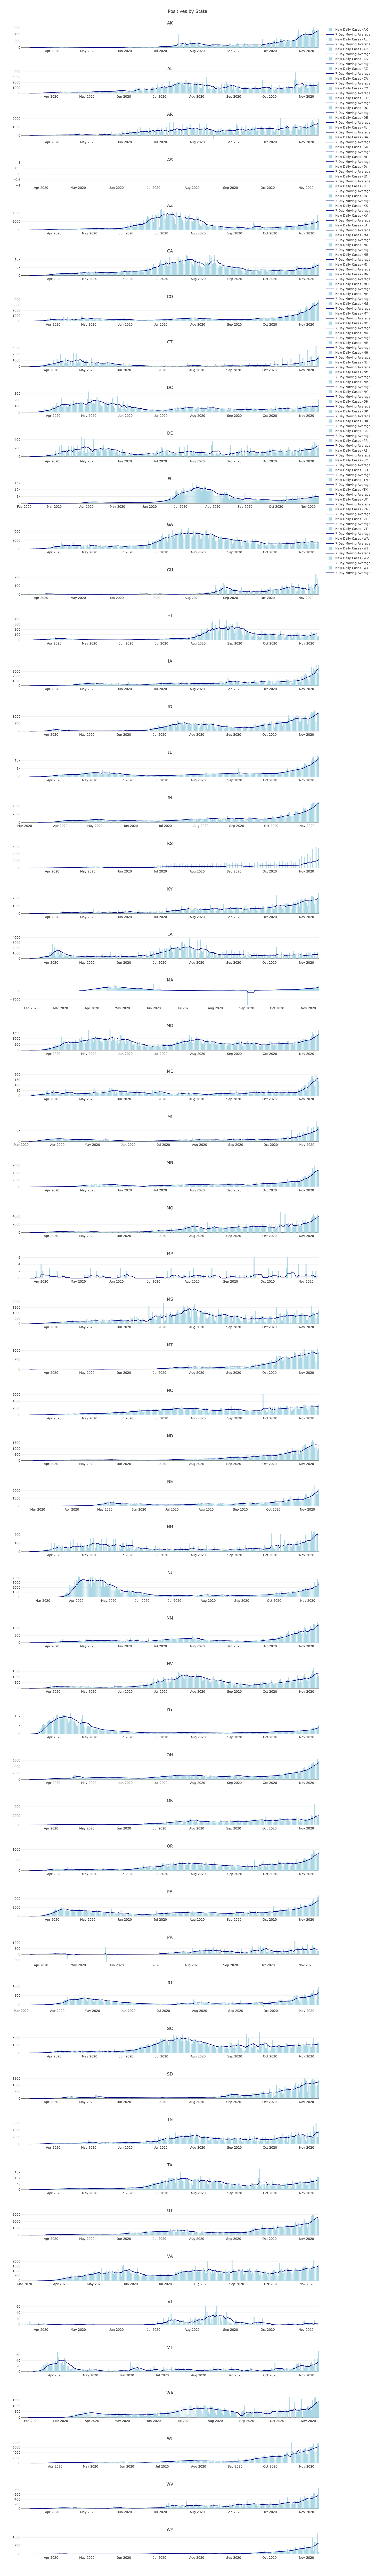

In [60]:
state_list =  us_states_daily_df.index.levels[0].tolist()

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig4 = make_subplots(rows=len(state_list), cols=1, subplot_titles=state_list)

for i in state_list:
    df = us_states_daily_df.loc[i][['positive','hospitalizedCumulative','death']].diff(periods=1)
    df_rolling = df.rolling(window=7).mean()
    
    fig4.add_trace(go.Bar(x=df.index, y=df['positive'], marker_color='lightblue', name= 'New Daily Cases -'+i), row=state_list.index(i)+1, col=1)
    fig4.add_trace(go.Scatter(x=df_rolling.index, y=df_rolling['positive'], marker_color='#000080', name = '7 Day Moving Average'), row=state_list.index(i)+1, col=1)


fig4.update_layout(template='none', height=10000, autosize=True, title='Positives by State')
fig4.show()   

#us_states_daily_df.loc['MN'][['positive','hospitalizedCumulative','death']].diff(periods=1)

In [32]:
us_states_daily_df_new_per_day = us_states_daily_df[['positive','hospitalizedCumulative','death']].diff(periods=1)

In [36]:
us_states_daily_df_new_per_day.loc['MN']

positive  hospitalizedCumulative   death
date                                                
2020-11-11  -57302.0                     NaN -5382.0
2020-11-10  -55571.0                     NaN -5396.0
2020-11-09  -53520.0                     NaN -5333.0
2020-11-08  -48141.0                     NaN -5289.0
2020-11-07  -54049.0                     NaN -5320.0
...              ...                     ...     ...
2020-03-10    -517.0                     NaN     NaN
2020-03-09    -367.0                     NaN     NaN
2020-03-08    -249.0                     NaN     NaN
2020-03-07    -186.0                     NaN     NaN
2020-03-06    -139.0                     NaN     NaN

[251 rows x 3 columns]

In [11]:
os.remove('covid_dashboard.html')

with open('covid_dashboard.html', 'a') as f:
    f.write("<style>* { font-family: 'Helvetica Neue'} </style>")
    f.write("<h1>COVID-19 Dashboard<h1>")
    f.write("<h3>"+datetime.datetime.now().strftime("%B %d, %Y")+"<h3>")
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))